In [1]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib as mpl
from datetime import timezone

register_matplotlib_converters()

# File locations
#----------------
the_gases = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/2oxaria/json/gap_filling/q12021/'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/pngs/gap_filling/'

In [2]:
# Load the df 
#-------------
oxaria2_pm = pd.read_feather(the_gases+'oxaria2_pm_q12021_gf.ftr').set_index(['tag','rec'])
oxaria2_pm_lt = oxaria2_pm.iloc[:,[0,1,2,3,28,29,30,31,32,33,34,42]]
del oxaria2_pm

# Checking out the data types 
#-----------------------------
oxaria2_pm_lt.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11063959 entries, ('scs-bgx-550', Timestamp('2021-01-01 00:00:03+0000', tz='UTC')) to ('scs-bgx-559', Timestamp('2021-05-31 23:59:55+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   val.mtf1     float32
 1   val.pm1      float32
 2   val.mtf5     float32
 3   val.pm2p5    float32
 4   val.mtf3     float32
 5   val.pm10     float32
 6   val.mtf7     float32
 7   val.per      float32
 8   val.sfr      float32
 9   val.sht.hmd  float32
 10  val.sht.tmp  float32
 11  name         object 
dtypes: float32(11), object(1)
memory usage: 915.9+ MB


In [3]:
# Some cleaning incase have missed anything
#-------------------------------------------
oxaria2_pm_lt = oxaria2_pm_lt[~oxaria2_pm_lt.index.duplicated(keep='last')].reset_index()
oxaria2_pm_lt = oxaria2_pm_lt.dropna(axis=0,subset=['tag','rec']).set_index(['tag','rec']).sort_index()

# Start and end dates of unstable operational periods

Have decided not to apply these as OPC do not seem to have start up problems in the same way as electrochems & applying them risks missing an event see 542 in earlt Feb below.


| Sensor tag         | Start               | End |
|-------------|---------------------|-----|
| scs-bgx-538 | 2021-01-28T00:00:00 | 2021-05-06T00:00:00 |
| scs-bgx-542 | 2021-01-27T12:00:00 | 2021-02-06T23:00:00 |
| scs-bgx-542 | 2021-04-19T09:00:00 | 2021-04-26T00:00:00 |
| scs-bgx-550 | 2021-03-10T12:00:00 | 2021-07-05T00:00:00 |
| scs-bgx-551 | 2021-01-01T00:00:00 | 2021-03-12T00:00:00 |
| scs-bgx-556 | 2021-02-09T12:00:00 | 2021-02-12T23:00:00 |

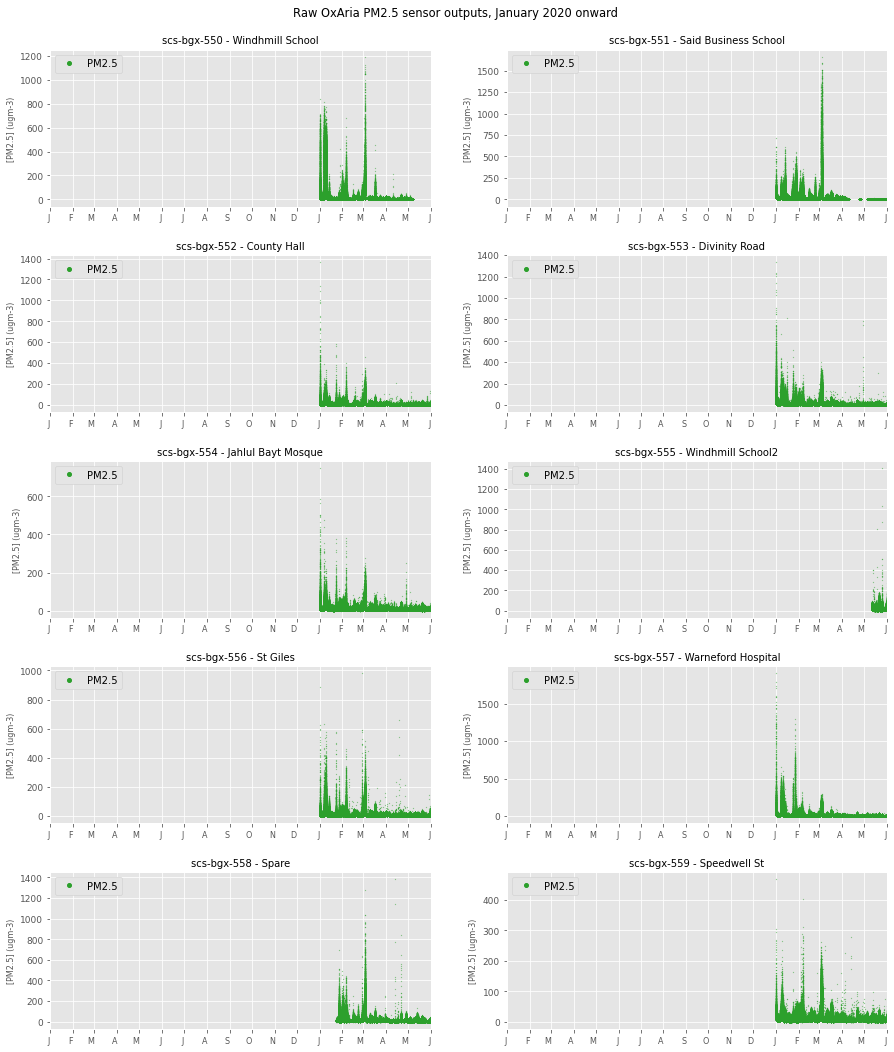

In [4]:
# PM2.5 plots
# -----------
plt.style.use('ggplot')
x_ticks = pd.date_range('2020-01-01', periods=18, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria PM2.5 sensor outputs, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria2_pm_lt.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.pm2p5', c='tab:green', linewidth=0.5, marker='o', ms=0.2, ls='',
             label='PM2.5', ax=ax, legend=True, zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM2.5] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    plt.subplots_adjust(wspace=0.2, hspace=0.31)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

#plt.savefig(pngs+'oxaria0_pm25_15m_raw_sensor_ts_536_q12021.png')
plt.show()

for ax in axes_list:
    ax.remove()

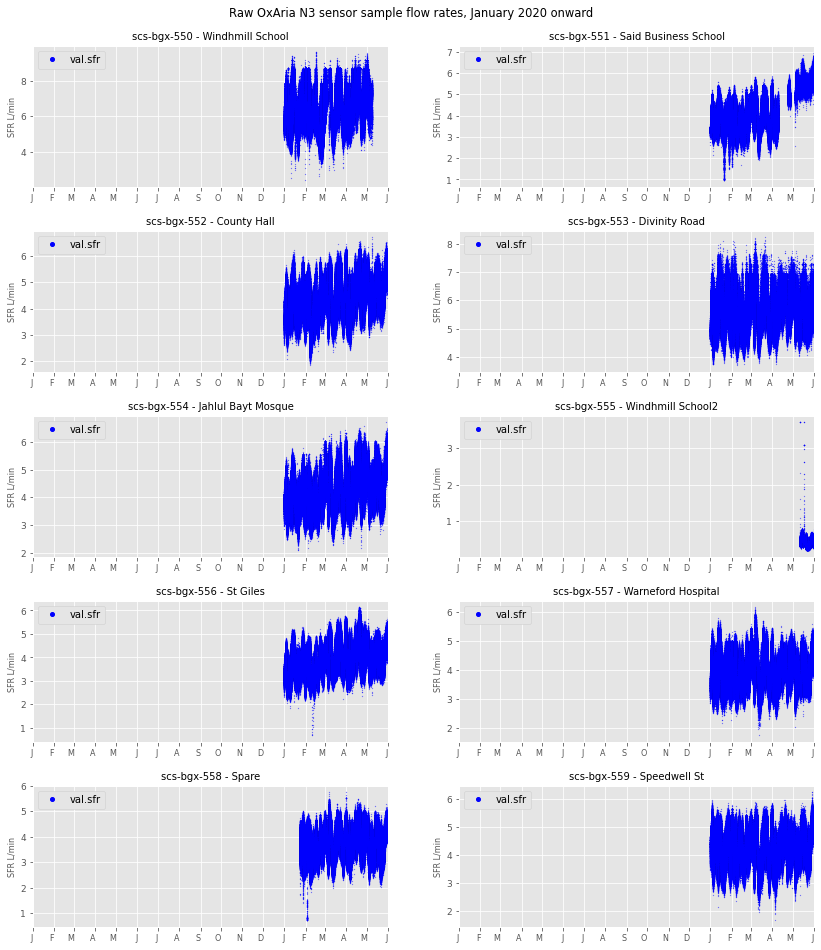

In [6]:
# PM2.5 plots
# -----------
plt.style.use('ggplot')
x_ticks = pd.date_range('2020-01-01', periods=18, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                         sharey=False, figsize=(14, 18))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria N3 sensor sample flow rates, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria2_pm_lt.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.sfr', c='b', linewidth=0.5, marker='o', ms=0.2, ls='',
             label='val.sfr', ax=ax, legend=True, zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('SFR L/min', fontsize=8)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    plt.subplots_adjust(wspace=0.2, hspace=0.31)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

#plt.savefig(pngs+'oxaria0_pm25_15m_raw_sensor_ts_536_q12021.png')
plt.show()

for ax in axes_list:
    ax.remove()

In [12]:
# Some cleaning incase have missed anything
#-------------------------------------------
oxaria2_pm_lt = oxaria2_pm_lt[~oxaria2_pm_lt.index.duplicated(keep='last')].reset_index()
oxaria2_pm_lt = oxaria2_pm_lt.dropna(axis=0,subset=['tag','rec']).set_index(['tag','rec']).sort_index()

In [13]:
# There don't seem to be any outages that need removing so just saving

# Apply empirical filters
#-------------------------
cols = ['val.pm10','val.pm2p5','val.pm1']

condition =  ((oxaria2_pm_lt['val.sfr'] < 2.0) | \
             (oxaria2_pm_lt['val.sht.tmp'] < -10.0) | \
             (oxaria2_pm_lt['val.sht.tmp'] > 35.0) | \
             (oxaria2_pm_lt['val.sht.hmd'] < 35.0))

for col in cols:
    oxaria2_pm_lt[col+'_1'] = np.where(condition, np.nan, oxaria2_pm_lt[col]) 
    
# Save to feather
#-----------------
oxaria2_pm_lt.reset_index().to_feather(the_gases+'oxaria2_pm_stable_536_q12021.ftr')
